## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline

In [42]:
#Seu Código aqui....
df = pd.read_csv('aptos.csv')
display(df)
df.dropna(axis=0, inplace=True)
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,Centro
110,56,247.0,2,1,0.0,Planalto
111,126,736.0,3,3,0.0,Iraja
112,96,560.0,3,1,0.0,Centro


,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     112 non-null    int64  
 1   valor      112 non-null    float64
 2   quartos    112 non-null    int64  
 3   vagas      112 non-null    int64  
 4   reformado  112 non-null    float64
 5   bairro     112 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 6.1+ KB


In [44]:
df.describe()

,metros,valor,quartos,vagas,reformado
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,79.383929,402.660714,2.553571,1.660714,0.517857
std,27.371072,171.723670,0.566947,0.691696,0.501927
min,43.000000,188.000000,1.000000,0.000000,0.000000
25%,56.000000,253.750000,2.000000,1.000000,0.000000
50%,71.000000,348.500000,3.000000,2.000000,1.000000
75%,97.000000,515.750000,3.000000,2.000000,1.000000
max,199.000000,880.000000,4.000000,4.000000,1.000000


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

* Bairro: O bairro onde o apartamento se localiza
* reformado: "1" se o apartamento esta reformado e "0" para nao reformado
* vagas: quantidade de vagas na garagem
* quantos: quantidade de quartos no apartamento
* valor: preço do apartamento 
* metros: tamanho em m² do apartamento

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

* Eu acho que quanto mais quartos, o valor e a metragem do apartamento são maiores
* Eu acho que o número de vagas é maior, quando o apartamento é maior


## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

<AxesSubplot:>

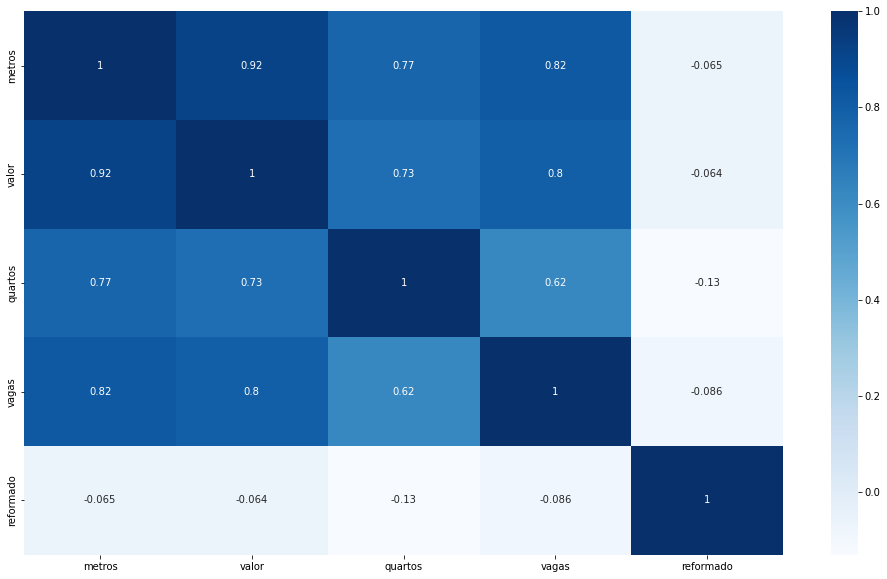

In [45]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

C:\Users\nonam\AppData\Local\Temp/ipykernel_2268/584365441.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped_df.index, rotation=90)


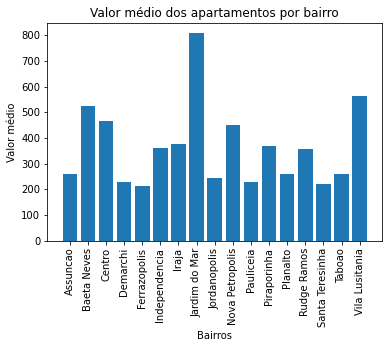

In [46]:
grouped_df = df.groupby('bairro')['valor'].mean()

fig, ax = plt.subplots()

ax.bar(grouped_df.index, grouped_df.values)

ax.set_xlabel('Bairros')
ax.set_ylabel('Valor médio')
ax.set_title('Valor médio dos apartamentos por bairro')
ax.set_xticklabels(grouped_df.index, rotation=90)

plt.show()

In [47]:
bairros = df['bairro'].value_counts()
print(bairros)

Centro             34
Baeta Neves        17
Assuncao            9
Rudge Ramos         9
Vila Lusitania      6
Planalto            5
Demarchi            5
Ferrazopolis        4
Taboao              4
Santa Teresinha     4
Independencia       3
Nova Petropolis     3
Iraja               3
Pauliceia           2
Jardim do Mar       2
Jordanopolis        1
Piraporinha         1
Name: bairro, dtype: int64


### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

In [48]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    
    limite_inferior = q1 - 1.5 * amplitude
    limite_superior = q3 + 1.5 * amplitude
    
    return limite_inferior, limite_superior

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    

Essas duas funções servem para analizar as outliers, a função "diagrama_caixa" vai plotar 2 graficos, o da esquerda irá mostrar os dados com outliers, e o da direita mostra como ficaria se retirassemos as outliers

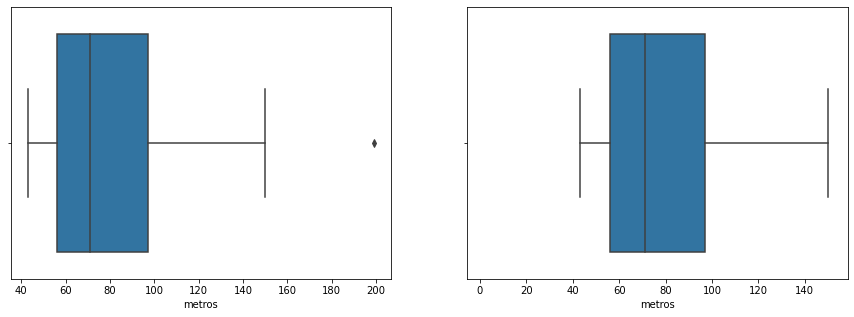

In [49]:
diagrama_caixa(df['metros'])

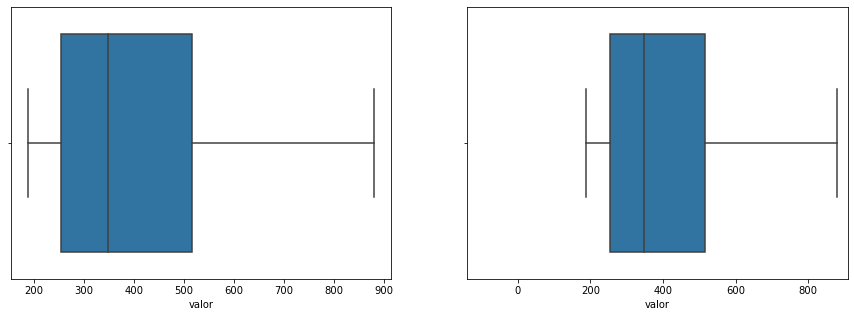

In [50]:
diagrama_caixa(df['valor'])

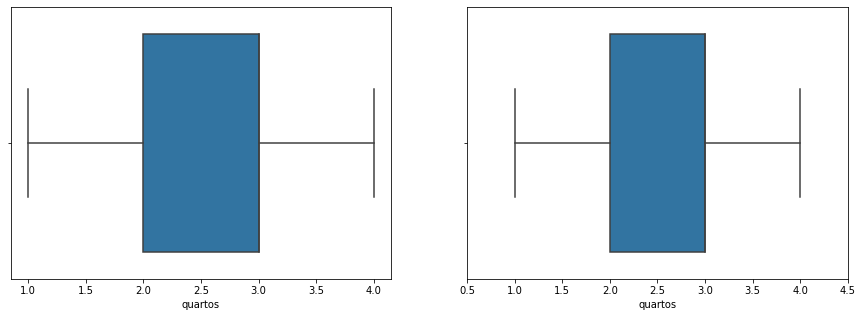

In [51]:
diagrama_caixa(df['quartos'])

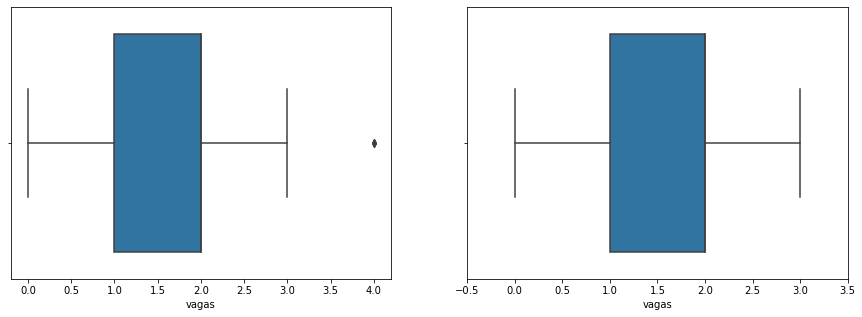

In [52]:
diagrama_caixa(df['vagas'])

#### Decidi não excluir nenhuma outlier pois o modelo funcionou melhor não excluindo

### ENCODING

In [53]:
df_cod = df.copy()
df_cod = pd.get_dummies(data=df_cod, columns=['bairro'])
display(df_cod)

,metros,valor,quartos,vagas,reformado,bairro_Assuncao,bairro_Baeta Neves,bairro_Centro,bairro_Demarchi,bairro_Ferrazopolis,...,bairro_Jardim do Mar,bairro_Jordanopolis,bairro_Nova Petropolis,bairro_Pauliceia,bairro_Piraporinha,bairro_Planalto,bairro_Rudge Ramos,bairro_Santa Teresinha,bairro_Taboao,bairro_Vila Lusitania
0,107,560.0,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,555.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,196.0,2,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,104,515.0,3,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,560.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,56,247.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,126,736.0,3,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,96,560.0,3,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado
    
Indica que é supervisionado pois os dados são rotulados

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo RandomForest
2. algoritimo LinearRegression

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. RandomForest: O algoritmo de Random Forest cria várias amostras de treinamento aleatórias do conjunto de dados original e, para cada amostra, constrói uma árvore de decisão utilizando um subconjunto aleatório de recursos em cada divisão da árvore. Dessa forma, várias árvores de decisão são criadas e combinadas para realizar a classificação ou regressão de uma determinada amostra.

2. LinearRegression: O algoritmo de Regressão Linear tenta encontrar a equação de uma linha reta que melhor se ajusta aos dados, de modo que possa ser usada para fazer previsões. O algoritmo funciona encontrando a linha que minimiza a distância entre os valores reais dos dados e os valores previstos pela linha.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [54]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [70]:
#Seu Código aqui...
x = df_cod.drop(['valor'], axis=1)
y = df_cod['valor']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [71]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}\n'

In [72]:
rf = RandomForestRegressor(random_state=30, max_depth=10, min_samples_split=10, n_estimators=5)
#treinar
rf.fit(x_train, y_train) #testando escalonado
#testar
previsao_rf = rf.predict(x_test)
print(avaliar_modelo('RandomForest', y_test, previsao_rf))

Modelo RandomForest:
R²:83.14%
RSME:71.34



In [73]:
rf = RandomForestRegressor(random_state=30, max_depth=10, min_samples_split=10, n_estimators=5)
#treinar
rf.fit(x_train, y_train) #testando escalonado
#testar
previsao_rf_treino = rf.predict(x_train)
print(avaliar_modelo('RandomForest', y_train, previsao_rf_treino))

Modelo RandomForest:
R²:92.57%
RSME:46.34



### Algoritmo 2

In [74]:
lr = LinearRegression()
#treinar
lr.fit(x_train, y_train)
#testar
previsao_lr = lr.predict(x_test)
print(avaliar_modelo('LinearRegression', y_test, previsao_lr))

Modelo LinearRegression:
R²:78.24%
RSME:81.05



In [75]:
lr = LinearRegression()
#treinar
lr.fit(x_train, y_train)
#testar
previsao_lr_treino = lr.predict(x_train)
print(avaliar_modelo('LinearRegression', y_train, previsao_lr_treino))

Modelo LinearRegression:
R²:88.39%
RSME:57.94



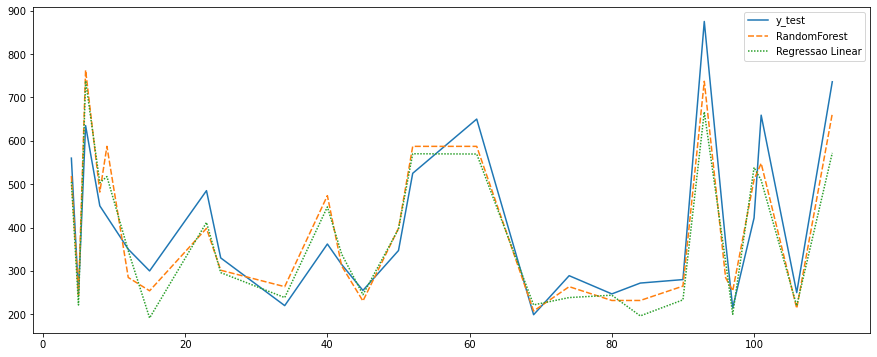

In [76]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_test'] = y_test
tabela_auxiliar["RandomForest"] = previsao_rf
tabela_auxiliar["Regressao Linear"] = previsao_lr

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [62]:
importancia = pd.DataFrame(rf.feature_importances_, x_train.columns)

            #ordenando por valores   #nomecoluna      #False para ser do maior para o menor             
importancia = importancia.sort_values(by=0 , ascending=False)
display(importancia)

,0
metros,0.898722
vagas,0.055954
bairro_Baeta Neves,0.032597
bairro_Nova Petropolis,0.004460
bairro_Assuncao,0.002780
reformado,0.002180
bairro_Taboao,0.001401
quartos,0.001148
bairro_Independencia,0.000437
bairro_Centro,0.000322


#### Aparentemente os bairros não tem tanta importancia para a precificação do apartamento

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 92 | 88 |
| teste  | 83 | 78 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O algoritmo que obteve o melhor resultado foi o RandomForest, pois o r² foi superior, e o RSME foi menor.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [63]:
testefinal = rf.predict([[72,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print(testefinal)

[298.74455128]


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Para o objetivo dele o resultado foi bom, poderia ser melhor porém faltou um pouco de dados

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Coletaria mais dados, pois a coluna "bairro" tem muito mais exemplos de centro que os demais




